In [26]:
import pandas as pd
import json
import os

update_rad = pd.read_excel(r"D:\WORK\EU_Proje\DeRad_Data_Revision\D.RAD WP3 Radicalization_REGIONAL.xlsx")
update_rad = update_rad.drop( ['Link','Type','lat','lon','quality','confidence'], axis =1 )
update_rad['source']  = 'radical'

update_derad = pd.read_excel( r"D:\WORK\EU_Proje\DeRad_Data_Revision\D.RAD WP3 De-Radicalization_REGIONAL.xlsx")
update_derad = update_derad.drop( ['Link','Type','lat','lon','quality','confidence'], axis =1 )
update_derad['source']  = 'deradical'
update_derad.head()

update_data = pd.concat( [update_rad,update_derad] )

update_data.head()

,Number,Location,Location.1,Location Info,Event Type,Event Description,Links,Country,Region,address,source,Name of Deradicalization Program,Date (initiated & discontinued),Agents,Approach,Scale,Targets
0,0,Turkish consulate Salzburg,Salzburg,Salzburg is a state (Land) of the modern Repub...,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,NaN,Austria,Central Europe,"Strubergasse 9, 5020 Salzburg, Austria",radical,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Kurdish Cultural Institute of Vienna,Vienna,"Vienna is the capital, largest city, and one o...",Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,NaN,Austria,Central Europe,"Schönbrunner Str. 213, Büro 308, 1120 Wien, Au...",radical,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Vienna,Vienna,"Vienna is the capital, largest city, and one o...",Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,NaN,Austria,Central Europe,"Reumannpl. 23, 1100 Wien, Austria",radical,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Novartis CEO's hunting lodge,"Bach, Tyrol",Tyrol is a state (Land) in western Austria. Wi...,Left Wing Extremism,Assailants set fire to the hunting lodge of t...,NaN,Austria,Central Europe,"Bach, Tyrol, Austria",radical,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Wiener Ballsaison,Vienna,"Vienna is the capital, largest city, and one o...",Left Wing Extremism,The Akademikerball (academic ball) is the repl...,NaN,Austria,Central Europe,"Hofburg Wien, 1010, Vienna 1, Vienna, Austria",radical,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
original_data = pd.read_json(r'C:\Git_Repo\Radical_Project\radmap\radmap\public\data\data.json')
original_data.head()

,Number,Location,Region,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source
0,0,Turkish consulate Salzburg,Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,None,Austria,"Strubergasse 9, 5020 Salzburg, Austria",47.809089,13.033605,Austria,tuvbsovw,None,None,None,None,None,None,radical
1,1,Kurdish Cultural Institute of Vienna,Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,None,Austria,"Schönbrunner Str. 213, Büro 308, 1120 Wien, Au...",48.184325,16.334930,Austria,rbwzxcht,None,None,None,None,None,None,radical
2,2,Vienna,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,None,Austria,"Reumannpl. 23, 1100 Wien, Austria",48.174291,16.378751,Austria,ogueqkrt,None,None,None,None,None,None,radical
3,3,Novartis CEO's hunting lodge,"Bach, Tyrol",Left Wing Extremism,Assailants set fire to the hunting lodge of t...,None,Austria,"Bach, Tyrol, Austria",47.270430,10.403720,Austria,qqpnbmue,None,None,None,None,None,None,radical
4,4,Wiener Ballsaison,Vienna,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,None,Austria,"Hofburg Wien, 1010, Vienna 1, Vienna, Austria",48.207740,16.366540,Austria,eaimujnt,None,None,None,None,None,None,radical


In [28]:
original_data = original_data.drop(['Region'], axis=1 )

In [29]:
rep_data = original_data.join(
    update_data[['Location.1','Number','source','Location Info']].set_index(['Number','source']),
    on=['Number','source'],
)

rep_data = rep_data.rename(columns={'Location.1':'Region',"Location Info":"Region Info"})
rep_data.head()

,Number,Location,Event Type,Event Description,Links,Country,address,lat,lon,NAME,uid,Program Name,Date,Agents,Approach,Scale,Targets,source,Region,Region Info
0,0,Turkish consulate Salzburg,Ethno-Nationalist,Suspected Kurdistan Workers Party (PKK) activi...,None,Austria,"Strubergasse 9, 5020 Salzburg, Austria",47.809089,13.033605,Austria,tuvbsovw,None,None,None,None,None,None,radical,Salzburg,Salzburg is a state (Land) of the modern Repub...
1,1,Kurdish Cultural Institute of Vienna,Ethno-Nationalist,Unknown arsonists threw several Molotov cockta...,None,Austria,"Schönbrunner Str. 213, Büro 308, 1120 Wien, Au...",48.184325,16.334930,Austria,rbwzxcht,None,None,None,None,None,None,radical,Vienna,"Vienna is the capital, largest city, and one o..."
2,2,Vienna,Ethno-Nationalist,Turkish nationalists attacked Kurdish activist...,None,Austria,"Reumannpl. 23, 1100 Wien, Austria",48.174291,16.378751,Austria,ogueqkrt,None,None,None,None,None,None,radical,Vienna,"Vienna is the capital, largest city, and one o..."
3,3,Novartis CEO's hunting lodge,Left Wing Extremism,Assailants set fire to the hunting lodge of t...,None,Austria,"Bach, Tyrol, Austria",47.270430,10.403720,Austria,qqpnbmue,None,None,None,None,None,None,radical,"Bach, Tyrol",Tyrol is a state (Land) in western Austria. Wi...
4,4,Wiener Ballsaison,Left Wing Extremism,The Akademikerball (academic ball) is the repl...,None,Austria,"Hofburg Wien, 1010, Vienna 1, Vienna, Austria",48.207740,16.366540,Austria,eaimujnt,None,None,None,None,None,None,radical,Vienna,"Vienna is the capital, largest city, and one o..."


In [30]:
rep_data.to_json(
    r'C:\Git_Repo\Radical_Project\radmap\radmap\public\data\data_update.json',
    orient='records',
)

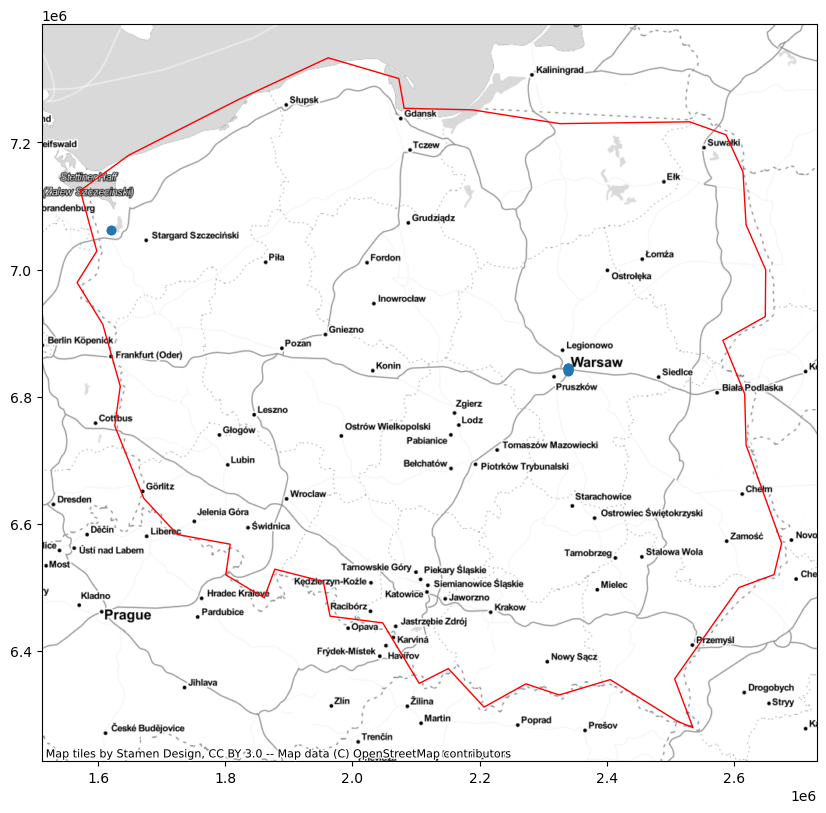

In [25]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

t = rep_data[ rep_data['Region'] == 'Masovian Voivodeship' ]
geot = gpd.GeoDataFrame(
    t, geometry=gpd.points_from_xy(t.lon, t.lat),
    crs = 4326
)

fig,ax = plt.subplots(figsize=(10,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[ world['name'] == "Poland"].to_crs(3857).plot( ax=ax , fc='none' , ec = 'red' )
geot.to_crs(3857).plot( ax=ax )
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

